In [1]:
# PCA Biplot

In [4]:
from pca import pca
import matplotlib.pyplot as plt 
import pandas as pd
import numpy as np
import os
from sklearn.preprocessing import StandardScaler 
from sklearn.decomposition import PCA 

In [5]:
milk = pd.read_csv(r"/home/sarthakredasani/Documents/CDAC_ML/Datasets/Datasets/milk.csv", index_col=0)
milk.head(5)

,water,protein,fat,lactose,ash
Animal,,,,,
HORSE,90.1,2.6,1.0,6.9,0.35
ORANGUTAN,88.5,1.4,3.5,6.0,0.24
MONKEY,88.4,2.2,2.7,6.4,0.18
DONKEY,90.3,1.7,1.4,6.2,0.40
HIPPO,90.4,0.6,4.5,4.4,0.10


In [7]:
# Standard Scaler is used

In [6]:
prcomp = PCA().set_output(transform='pandas')
scaler = StandardScaler().set_output(transform='pandas')
milk_scaled = scaler.fit_transform(milk)
components = prcomp.fit_transform(milk_scaled)

In [8]:
# Eigen Vectors

In [9]:
prcomp.components_

array([[ 0.47294379, -0.46657047, -0.44868269,  0.48289116, -0.35232959],
       [ 0.35285509,  0.32094099, -0.47603724,  0.05951482,  0.73643513],
       [-0.36921298, -0.15196177,  0.30699163,  0.77642589,  0.378825  ],
       [-0.10893632,  0.78672876, -0.17660367,  0.38468756, -0.43590982],
       [ 0.70967042,  0.1930657 ,  0.66831106,  0.11159049, -0.00118661]])

In [10]:
model = pca()

In [11]:
results = model.fit_transform(milk_scaled, col_labels= milk.columns, row_labels=list(milk.index))

[pca] >The PCA reduction is performed to capture [95.0%] explained variance using the [5] columns of the input data.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Compute explained variance.
[pca] >Number of components is [2] that covers the [95.00%] explained variance.
[pca] >The PCA reduction is performed on the [5] columns of the input dataframe.
[pca] >Fit using PCA.
[pca] >Compute loadings and PCs.
[pca] >Outlier detection using Hotelling T2 test with alpha=[0.05] and n_components=[2]
[pca] >Multiple test correction applied for Hotelling T2 test: [fdr_bh]
[pca] >Outlier detection using SPE/DmodX with n_std=[3]


[pca]> [WARNING]: De parameter <label> is deprecated and will not be supported in future version.
[pca] >Plot PC1 vs PC2 with loadings.
[scatterd]> WARNING use the standardized verbose status. The status [1-6] will be deprecated in future versions.


[10-05-2025 14:31:09] [scatterd.scatterd] [INFO] Create scatterplot


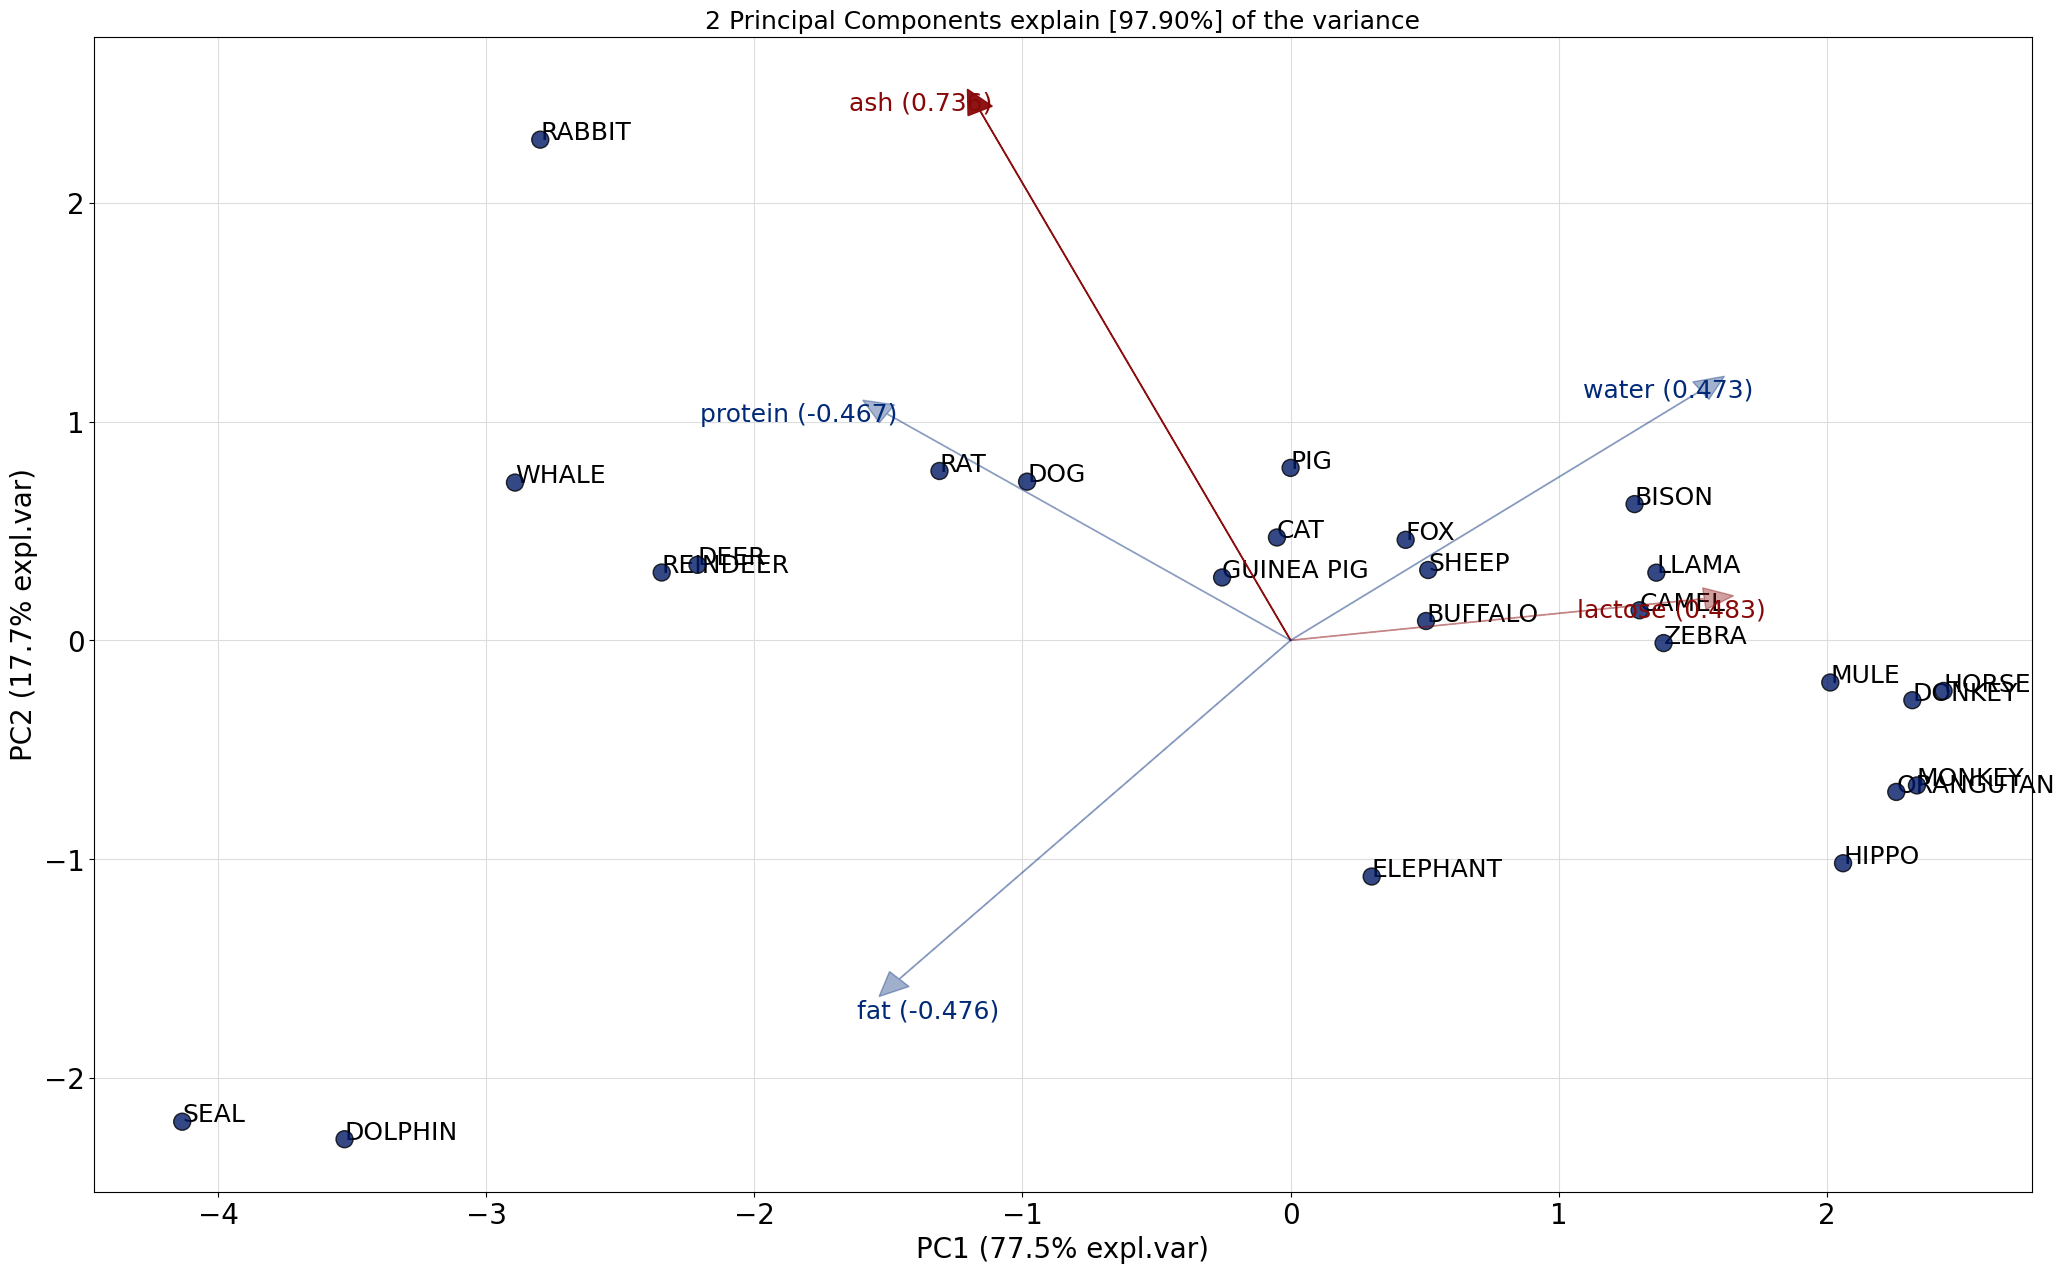

In [12]:
model.biplot(label=True,legend=True)
for i in np.arange(0, milk.shape[0] ):
    plt.text(components.values[i,0],  components.values[i,1],  list(milk.index)[i])
plt.show()